**Micro Finance Loan Credit Scoring**

> Add blockquote

> Add blockquote





In this project, I aim to identify dairy farmers suitable for a 13-week loan product based on their payment consistency and milk supply volume. Using one year of historical payment data. I do this by:

1.   Identifying Consistent Farmers: Analyzing the past 52 weeks to find farmers with consistent weekly payments, indicating reliability.



2.   Calculating Loan Amounts: Determine average weekly payments and offer loans proportionate to their payment capacity.
This ensures I target reliable farmers and offer loans they can repay, supporting business stability and growth.











In [ ]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install warnings
import warnings
warnings.filterwarnings('ignore')

ERROR: Could not find a version that satisfies the requirement warnings (from versions: none)
ERROR: No matching distribution found for warnings


In [ ]:
df = pd.read_csv('/content/farmers_salary_transactions.csv')
df

,Farmer No.,Week1,Week2,Week3,Week4,Week5,Week6,Week7,Week8,Week9,...,Week43,Week44,Week45,Week46,Week47,Week48,Week49,Week50,Week51,Week52
0,1,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,"2,918","1,882","1,939","1,115"
1,2,"6,487","10,898","5,133","3,138","3,056","5,293","3,170","2,751",-,...,900,-,"1,931",122,-,"2,704","7,147","5,125","2,589",917
2,3,"1,289","1,392","1,789","1,319",662,"2,290","1,994","2,527","1,172",...,"2,104","2,306","1,206","1,417","1,310","2,153","1,771","3,527","3,665","3,110"
3,4,"3,844","4,256","3,716","4,511","5,209","7,299","9,899","7,440","1,915",...,"23,350","26,493","1,217","2,791",-,"5,203","7,938","1,909",850,546
4,5,"3,428","2,346","2,419","2,110","1,569","2,110","1,951",936,169,...,548,"1,216",657,225,357,-,-,181,189,76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,1271,-,706,"3,507",908,"1,008",794,336,170,-,...,-,"5,160","5,899","12,465","13,900","14,840","10,741","12,040","9,241","10,365"
1271,1272,"174,233","90,237","65,438","23,628","2,536","3,241","2,550","1,662",977,...,"6,230","2,736","2,681","4,051","2,703","3,651","4,974","2,088","2,112","3,358"
1272,1273,"9,490","18,144","1,728","1,573",-,-,"1,564",655,-,...,839,-,-,-,-,-,-,-,-,-
1273,1274,"40,052","16,401","6,779","24,153","26,360","5,329","4,225",696,-,...,-,-,-,-,-,"13,824","16,870","15,624","5,414","9,373"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 53 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Farmer No.  1275 non-null   int64 
 1   Week1       1275 non-null   object
 2   Week2       1275 non-null   object
 3   Week3       1275 non-null   object
 4   Week4       1275 non-null   object
 5   Week5       1275 non-null   object
 6   Week6       1275 non-null   object
 7   Week7       1275 non-null   object
 8   Week8       1275 non-null   object
 9   Week9       1275 non-null   object
 10  Week10      1275 non-null   object
 11  Week11      1275 non-null   object
 12  Week12      1275 non-null   object
 13  Week13      1275 non-null   object
 14  Week14      1275 non-null   object
 15  Week15      1275 non-null   object
 16  Week16      1275 non-null   object
 17  Week17      1275 non-null   object
 18  Week18      1275 non-null   object
 19  Week19      1275 non-null   object
 20  Week20  

### observation

week 1 to week 52 have object datatype instead of integer

In [ ]:
#change data type to integer
weekly_columns = df.columns[1:53]
# Replace non-numeric strings with 0 before converting to integer
df[weekly_columns] = df[weekly_columns].replace('[^0-9]', '0', regex=True).fillna(0).astype(int)
df

,Farmer No.,Week1,Week2,Week3,Week4,Week5,Week6,Week7,Week8,Week9,...,Week43,Week44,Week45,Week46,Week47,Week48,Week49,Week50,Week51,Week52
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,20918,10882,10939,10115
1,2,60487,100898,50133,30138,30056,50293,30170,20751,0,...,900,0,10931,122,0,20704,70147,50125,20589,917
2,3,10289,10392,10789,10319,662,20290,10994,20527,10172,...,20104,20306,10206,10417,10310,20153,10771,30527,30665,30110
3,4,30844,40256,30716,40511,50209,70299,90899,70440,10915,...,230350,260493,10217,20791,0,50203,70938,10909,850,546
4,5,30428,20346,20419,20110,10569,20110,10951,936,169,...,548,10216,657,225,357,0,0,181,189,76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,1271,0,706,30507,908,10008,794,336,170,0,...,0,50160,50899,120465,130900,140840,100741,120040,90241,100365
1271,1272,1740233,900237,650438,230628,20536,30241,20550,10662,977,...,60230,20736,20681,40051,20703,30651,40974,20088,20112,30358
1272,1273,90490,180144,10728,10573,0,0,10564,655,0,...,839,0,0,0,0,0,0,0,0,0
1273,1274,400052,160401,60779,240153,260360,50329,40225,696,0,...,0,0,0,0,0,130824,160870,150624,50414,90373


In [ ]:
df.describe()

,Farmer No.,Week1,Week2,Week3,Week4,Week5,Week6,Week7,Week8,Week9,...,Week43,Week44,Week45,Week46,Week47,Week48,Week49,Week50,Week51,Week52
count,1275.000000,1.275000e+03,1.275000e+03,1.275000e+03,1.275000e+03,1.275000e+03,1.275000e+03,1.275000e+03,1.275000e+03,1.275000e+03,...,1.275000e+03,1.275000e+03,1.275000e+03,1.275000e+03,1.275000e+03,1.275000e+03,1.275000e+03,1.275000e+03,1.275000e+03,1.275000e+03
mean,638.000000,1.463915e+05,1.566054e+05,1.479062e+05,1.506029e+05,1.159654e+05,1.769114e+05,1.941592e+05,1.859918e+05,8.955291e+04,...,1.355442e+05,1.055812e+05,9.065178e+04,8.649024e+04,9.248211e+04,1.078926e+05,1.350091e+05,1.388622e+05,9.721184e+04,1.490062e+05
std,368.205106,3.437901e+05,3.699922e+05,3.527986e+05,3.432446e+05,2.643046e+05,3.990051e+05,4.752734e+05,4.134645e+05,2.080575e+05,...,2.921751e+05,2.423852e+05,2.255094e+05,2.153240e+05,2.272526e+05,2.568438e+05,3.279180e+05,3.211043e+05,2.739512e+05,3.453322e+05
min,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,319.500000,3.400000e+02,3.985000e+02,4.475000e+02,5.030000e+02,1.560000e+02,4.705000e+02,3.810000e+02,4.205000e+02,0.000000e+00,...,6.225000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.170000e+02,1.007050e+04,1.035050e+04,6.455000e+02,1.043350e+04
50%,638.000000,4.021300e+04,4.007000e+04,4.015500e+04,4.004000e+04,3.013700e+04,4.091000e+04,4.093100e+04,4.084600e+04,2.002400e+04,...,4.037300e+04,3.055500e+04,2.085200e+04,2.051800e+04,2.063300e+04,3.099800e+04,5.024200e+04,5.012500e+04,2.096700e+04,5.011600e+04
75%,956.500000,1.505085e+05,1.454765e+05,1.400605e+05,1.409025e+05,1.200835e+05,1.704355e+05,1.901640e+05,1.901215e+05,9.098250e+04,...,1.608105e+05,1.208375e+05,1.005715e+05,9.021900e+04,1.001045e+05,1.109035e+05,1.407535e+05,1.405915e+05,9.050350e+04,1.504320e+05
max,1275.000000,6.510762e+06,4.490877e+06,5.070413e+06,4.200506e+06,3.090626e+06,5.270924e+06,6.680722e+06,6.230627e+06,3.360218e+06,...,5.470147e+06,5.540049e+06,5.490871e+06,5.290063e+06,5.340634e+06,5.060125e+06,5.170352e+06,5.240823e+06,5.160755e+06,5.180525e+06


### **Data Exploration**
### Data cleaning

In [ ]:
#check for outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

#determine outliers using IQR
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
outliers = (df < lower_bound) | (df > upper_bound)
outliers.value_counts().sum()

1275

### **observation**
They are 1275 outliers

In [ ]:
#drop/remove outliers
df = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]
df

,Farmer No.,Week1,Week2,Week3,Week4,Week5,Week6,Week7,Week8,Week9,...,Week43,Week44,Week45,Week46,Week47,Week48,Week49,Week50,Week51,Week52
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,20918,10882,10939,10115
1,2,60487,100898,50133,30138,30056,50293,30170,20751,0,...,900,0,10931,122,0,20704,70147,50125,20589,917
2,3,10289,10392,10789,10319,662,20290,10994,20527,10172,...,20104,20306,10206,10417,10310,20153,10771,30527,30665,30110
4,5,30428,20346,20419,20110,10569,20110,10951,936,169,...,548,10216,657,225,357,0,0,181,189,76
6,7,100771,160357,140147,140839,50200,10357,60563,90316,60183,...,0,0,0,0,0,20186,30883,0,0,50117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1260,1261,60643,20074,218,506,158,0,0,0,0,...,70075,70275,50179,30727,543,992,30424,0,353,30584
1262,1263,10348,10989,20279,20326,20338,20179,10974,20254,10356,...,10692,20161,10833,20186,20157,10958,10283,10339,10000,10486
1268,1269,10696,958,616,453,10251,10437,10082,10072,431,...,10937,10691,10911,10986,10690,10913,20027,10709,10927,10337
1270,1271,0,706,30507,908,10008,794,336,170,0,...,0,50160,50899,120465,130900,140840,100741,120040,90241,100365


In [ ]:
#check for NaNs and duplicates
df.isna().sum()

Farmer No.    0
Week1         0
Week2         0
Week3         0
Week4         0
Week5         0
Week6         0
Week7         0
Week8         0
Week9         0
Week10        0
Week11        0
Week12        0
Week13        0
Week14        0
Week15        0
Week16        0
Week17        0
Week18        0
Week19        0
Week20        0
Week21        0
Week22        0
Week23        0
Week24        0
Week25        0
Week26        0
Week27        0
Week28        0
Week29        0
Week30        0
Week31        0
Week32        0
Week33        0
Week34        0
Week35        0
Week36        0
Week37        0
Week38        0
Week39        0
Week40        0
Week41        0
Week42        0
Week43        0
Week44        0
Week45        0
Week46        0
Week47        0
Week48        0
Week49        0
Week50        0
Week51        0
Week52        0
dtype: int64

In [ ]:
df.duplicated().sum()

0

No NaNs,no duplicates,no outliers, no missing values
our data is clean for Exploration , Visualisation and model building(if we have to)

### **Let's explore the data**

In [ ]:
#how many farmers are in this dataset?
df['Farmer No.'].value_counts().sum()

784

In [ ]:
#we want to find out which farmers were consistent over the 52 weeks
# Calculate the number of weeks each farmer made a NON-ZERO payment
df['WeeksPaid'] = df.iloc[:, 1:53].gt(0).sum(axis=1)

# Filter out the consistent farmers
consistent_farmers = df[df['WeeksPaid'] == 52]

# Display the consistent farmers
consistent_farmers.value_counts().sum()


147

### **Consistent Farmers**

In [ ]:
#sum of the consistent farmers
consistent_farmers['Farmer No.'].value_counts().sum()


147

In [ ]:
#display the consistent farmers
#we want to find out which farmers were consistent over the 52 weeks
# Calculate the number of weeks each farmer made a NON-ZERO payment
df['WeeksPaid'] = df.iloc[:, 1:53].gt(0).sum(axis=1)

# Filter out the consistent farmers
consistent_farmers = df[df['WeeksPaid'] == 52]

# Calculate the TotalPayment for each consistent farmer (assuming payments are in columns 1 to 52)
consistent_farmers['TotalPayment'] = consistent_farmers.iloc[:, 1:53].sum(axis=1)

# Display the consistent farmers
consistent_farmers.value_counts().sum()

#sum of the consistent farmers
consistent_farmers['Farmer No.'].value_counts().sum()

#display the consistent farmers
#set farmer no. as the index
consistent_farmers = consistent_farmers.set_index('Farmer No.')
consistent_farmers


,Week1,Week2,Week3,Week4,Week5,Week6,Week7,Week8,Week9,Week10,...,Week45,Week46,Week47,Week48,Week49,Week50,Week51,Week52,WeeksPaid,TotalPayment
Farmer No.,,,,,,,,,,,,,,,,,,,,,
19,10898,50133,50549,40730,20531,110965,230736,280502,140934,140749,...,40983,60301,110082,90619,80779,160466,80787,50371,52,7598450
36,40178,50301,60730,60527,60535,70820,70283,70790,50369,120633,...,666,538,615,583,493,10235,10797,20084,52,2696911
43,160751,70644,60756,60455,80283,90646,120433,120119,70517,220686,...,10829,10788,20119,40248,40697,40645,30606,60886,52,9056433
45,40387,20531,20286,10938,10125,20578,20893,704,882,70917,...,180638,160228,210590,160546,160140,190578,180225,210962,52,10906002
47,50971,60220,60501,50615,40452,40991,40779,50270,40241,80967,...,976,20587,30147,40224,50124,40556,30692,50214,52,2473749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1241,30180,20088,10631,10568,10367,10683,10419,10662,910,20017,...,20742,20687,20413,20790,10939,10856,10099,10341,52,1293129
1251,60374,50848,60766,50338,30913,60921,30913,40063,20200,60279,...,80340,90380,80792,90428,120032,110437,90357,70561,52,5686559
1259,40399,20202,20072,10727,10628,10592,20666,30074,10414,90423,...,110769,100668,60264,80350,70241,70258,30914,60775,52,4868484


Text(0.5, 1.0, 'Distribution of Total Payments')

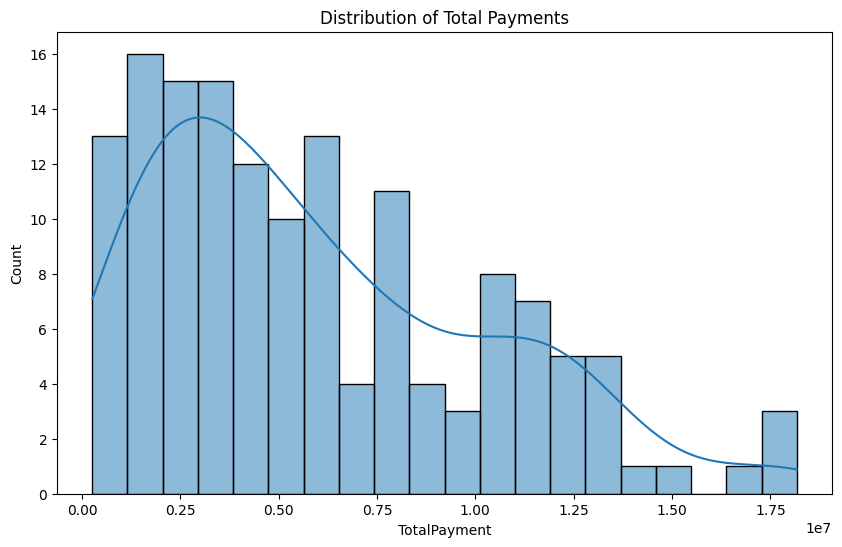

In [ ]:
#distribution of payments
plt.figure(figsize=(10, 6))
sns.histplot(consistent_farmers['TotalPayment'], bins=20, kde=True)
plt.title('Distribution of Total Payments')

Text(0.5, 1.0, 'Total Payments Over Time')

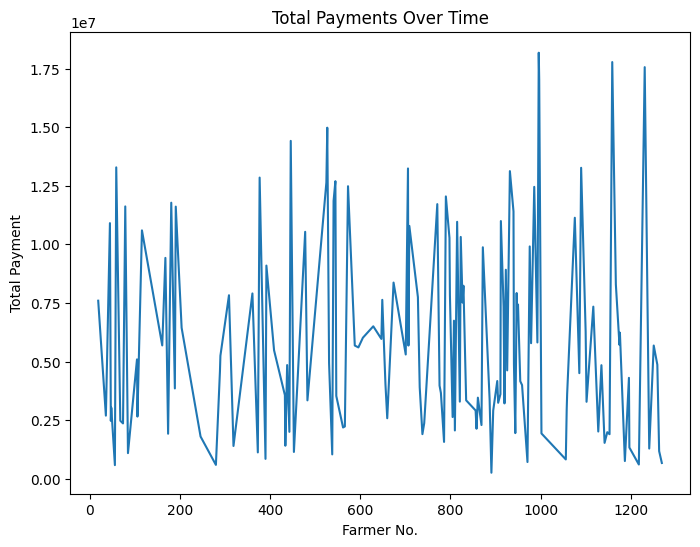

In [ ]:
#check for seasonality in the patterns
plt.figure(figsize=(8, 6))
sns.lineplot(x=consistent_farmers.index, y='TotalPayment', data=consistent_farmers)
plt.xlabel('Farmer No.')
plt.ylabel('Total Payment')
plt.title('Total Payments Over Time')

In [ ]:
#average of Total Payment for consitent farmers.
consistent_farmers['TotalPayment'].mean()


5971039.544217687

### **Analysis of inconsistence farmers**

In [ ]:
#number of farmers who  were incosistent in their payments
inconsistent_farmers = df[df['WeeksPaid'] != 52]
inconsistent_farmers.value_counts().sum()


637

In [ ]:
#display incosistent farmers
inconsistent_farmers = inconsistent_farmers.set_index('Farmer No.')
inconsistent_farmers

,Week1,Week2,Week3,Week4,Week5,Week6,Week7,Week8,Week9,Week10,...,Week44,Week45,Week46,Week47,Week48,Week49,Week50,Week51,Week52,WeeksPaid
Farmer No.,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,20918,10882,10939,10115,23
2,60487,100898,50133,30138,30056,50293,30170,20751,0,30333,...,0,10931,122,0,20704,70147,50125,20589,917,45
3,10289,10392,10789,10319,662,20290,10994,20527,10172,30059,...,20306,10206,10417,10310,20153,10771,30527,30665,30110,46
5,30428,20346,20419,20110,10569,20110,10951,936,169,235,...,10216,657,225,357,0,0,181,189,76,43
7,100771,160357,140147,140839,50200,10357,60563,90316,60183,80935,...,0,0,0,0,20186,30883,0,0,50117,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,0,0,0,0,0,0,0,0,0,0,...,20591,20073,20467,20193,20608,10832,10757,797,10485,37
1258,40614,20311,20699,20958,20036,10407,791,506,0,443,...,20402,40688,50772,20703,30702,40657,50188,10340,10615,45
1261,60643,20074,218,506,158,0,0,0,0,0,...,70275,50179,30727,543,992,30424,0,353,30584,43


In [ ]:
#farmers who didnt make any payments
no_payments = df[df['WeeksPaid'] == 0]
no_payments.value_counts().sum()
no_payments

,Farmer No.,Week1,Week2,Week3,Week4,Week5,Week6,Week7,Week8,Week9,...,Week44,Week45,Week46,Week47,Week48,Week49,Week50,Week51,Week52,WeeksPaid
140,141,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1130,1131,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#calculate total payment for each incosistent farmer
inconsistent_farmers['TotalPayment'] = inconsistent_farmers.iloc[:, 1:53].sum(axis=1)
#average payment of inconsistent farmers
inconsistent_farmers['TotalPayment'].mean()

4412468.819466248

### **Insights**

1. Of the 784 farmers who were given loans those who consistently made payments throught the 52 weeks are 147 which means even in the next 13 weeks they are likely to be consistent.

2. 625 farmers were inconsistent with their payments

3. 2 farmers didnot make any payments at all

4. The average total payment of each consistent farmer is 5943327.48427673

5. The average total payment of each incosistent farmer is 4369375.464

6. Considering consistency 147 farmers qualify for loan product X

### **Advice/Approach**



**Rule-Based System:**  Based on this analysis, we can a set rules . For example:

Each Farmer with consistent payments can be given loan product X that 20% above their average mean payment of the previous loan in the past 52 weeks.

Each farmer with inconsistent payments can be given loan product X that 20% below their average mean payment of the previous loan in the past 52 weeks.

Farmers who didint make any payments should not be given a loan product X.

In [ ]:
#I llustration of the simple rule
#Finding out a loan amount that aligns with the farmer's ability to repay over the next 13 weeks
#1. for consistent farmers
loan_multiplier = 1.2  # Offer a loan 20% higher than average payment
consistent_farmers['LoanAmount'] = consistent_farmers['TotalPayment'] * loan_multiplier
consistent_farmers[['TotalPayment', 'LoanAmount']]

,TotalPayment,LoanAmount
Farmer No.,,
19,7598450,9118140.0
36,2696911,3236293.2
43,9056433,10867719.6
45,10906002,13087202.4
47,2473749,2968498.8
...,...,...
1241,1293129,1551754.8
1251,5686559,6823870.8
1259,4868484,5842180.8


In [ ]:
#incosistent should be a given a loan that is 20% lower than their average total payment
Loan_Multiplier = 0.8
inconsistent_farmers['LoanAmount'] = inconsistent_farmers['TotalPayment'] * Loan_Multiplier
inconsistent_farmers[['TotalPayment', 'LoanAmount']]

,TotalPayment,LoanAmount
Farmer No.,,
1,3613636,2890908.8
2,4838350,3870680.0
3,3241354,2593083.2
5,451356,361084.8
7,6950865,5560692.0
...,...,...
1256,1129097,903277.6
1258,1293088,1034470.4
1261,5789626,4631700.8
